In [102]:
import torch
import numpy as np
from torch.distributions import multinomial
from d2l import torch as d2l

In [103]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [104]:
def make_data(w, b, num):
    X = torch.normal(0, 1, (num, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 1, y.shape)
    return X, y.reshape(-1,1)

In [105]:
ture_w = torch.tensor([2.0, -3.4])
true_b = 4.2
features, label = make_data(ture_w, true_b, 1000)

In [106]:
print('features:', features[0], '\nlabel:', label[0])

features: tensor([-0.5333, -0.3837]) 
label: tensor([4.5672])


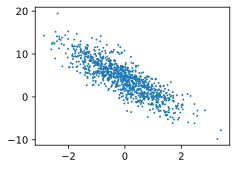

In [107]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), label.detach().numpy(), 1)

In [108]:
def data_iter(batch_size, features, lebal):
    num = len(features)
    indices = list(range(num))
    random.shuffle(indices)
    for i in range(0, num, batch_size):
        bat = torch.tensor(indices[i: min(i + batch_size, num)])
        yield features[bat], label[bat]

In [109]:
batch_size = 16

for X, y in data_iter(batch_size, features, label):
    print(X, '\n', y)
    break

tensor([[ 0.1771,  2.4314],
        [-0.7820, -1.4178],
        [-1.3355, -0.2249],
        [ 2.3159, -0.2368],
        [-1.1436, -1.7186],
        [ 1.4361, -0.7664],
        [ 1.3707,  1.3796],
        [ 0.2161, -0.3984],
        [-1.1127, -0.2845],
        [-0.1541, -2.5877],
        [-1.1810, -1.1203],
        [-0.9621, -1.0399],
        [-0.3629,  0.0522],
        [ 0.1587, -0.3380],
        [ 1.0157,  0.0875],
        [-0.8377, -0.6576]]) 
 tensor([[-3.9577],
        [ 5.0592],
        [ 1.6887],
        [10.3080],
        [ 9.3653],
        [11.4751],
        [ 2.5388],
        [ 4.9853],
        [ 2.6108],
        [12.3095],
        [ 5.1900],
        [ 5.6760],
        [ 3.8760],
        [ 6.3253],
        [ 6.8662],
        [ 5.0558]])


In [110]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [111]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [112]:
lr = 0.03
epochs = 3
net = linreg
loss = squared_loss

for epoch in range(epochs):
    for X, y in data_iter(batch_size, features, label):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), label)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.819638
epoch 2, loss 0.501726
epoch 3, loss 0.500295


In [113]:
w,b

(tensor([[ 1.9896],
         [-3.3493]], requires_grad=True),
 tensor([4.2058], requires_grad=True))

In [115]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([ 0.0104, -0.0507], grad_fn=<SubBackward0>)
b的估计误差: tensor([-0.0058], grad_fn=<RsubBackward1>)
